In [1]:
%matplotlib inline
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import imutils
import pandas as pd

In [2]:

img_data_path = 'X:/Flipkart GRID - Object Localization (Medium Complexity Round)/orig_data/data/images'
# img_path = os.path.join(img_data_path, img_name)

In [3]:
test_df = pd.read_csv(os.path.join('X:/Flipkart GRID - Object Localization (Medium Complexity Round)/orig_data', 'test.csv'))

In [4]:
test_df.head()

image_name  x1  x2  y1  y2
0               1474723840903DSC08089.png NaN NaN NaN NaN
1        1473231475010DeeplearnS11276.png NaN NaN NaN NaN
2  JPEG_20161205_135307_1000155917326.png NaN NaN NaN NaN
3  JPEG_20160711_123440_1000518778437.png NaN NaN NaN NaN
4   JPEG_20160803_115329_100034020722.png NaN NaN NaN NaN

In [5]:
def get_bbox(img, area_threshold = 1200):
    shifted = cv2.pyrMeanShiftFiltering(img, 0, 40)
    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    res_cnts = []
    contours = imutils.grab_contours(cnts)
    # print("[INFO] {} unique contours found".format(len(contours)))

    # loop over the contours
    for (i, c) in enumerate(contours):
        ((x, y), _) = cv2.minEnclosingCircle(c)
        cnt_area = cv2.contourArea(c)
        if cnt_area < area_threshold:
            # cv2.putText(img, "#{}".format(i + 1), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
            # cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
            res_cnts.append(c)
    cnt = cnts[0]
    for c in res_cnts:
        cv2.fillPoly(cnt, [c], (0, 0, 0))
    x,y,w,h = cv2.boundingRect(cnt)
    return x, x + w, y, y + h

1474723840903DSC08089.png
JPEG_20161202_161825_1000939470664.png
JPEG_20160620_152017_1000854758747.png
JPEG_20161123_133535_1000150568245.png
JPEG_20160704_153826_100067342880.png
1475009456032DSC020581.png
JPEG_20160620_213020_1000351874479.png
1468479612438JPEG_20160630_171033_100031050544.png
JPEG_20161028_143358_1000697209399.png
JPEG_20161124_131444_1000937680209.png
JPEG_20161123_180448_1000929053034.png
JPEG_20160608_140853_1000511330581.png
JPEG_20161202_153944_1000911442221.png


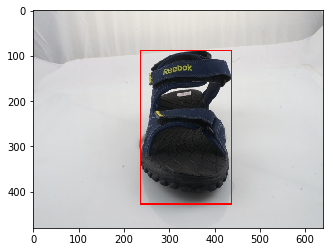

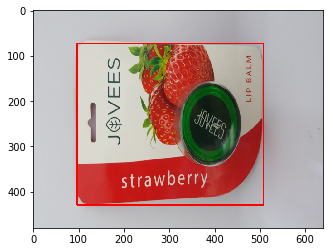

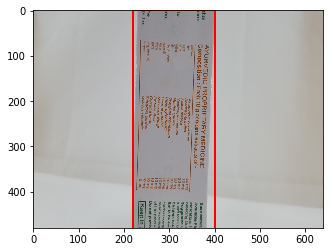

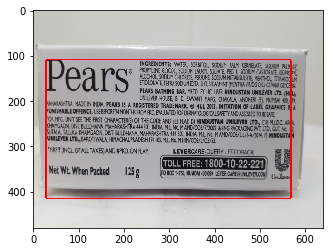

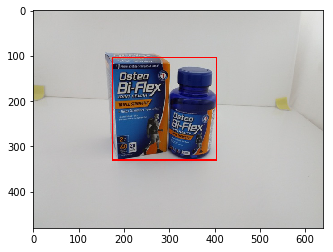

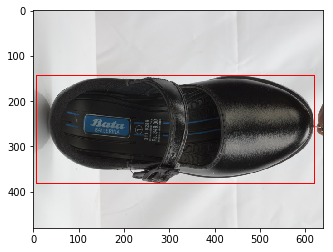

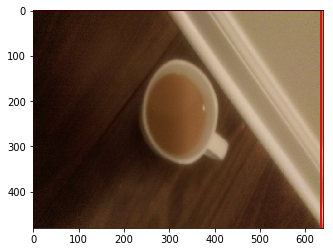

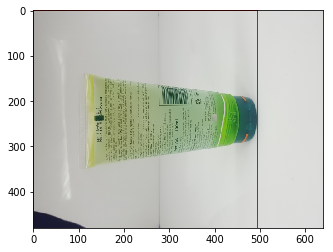

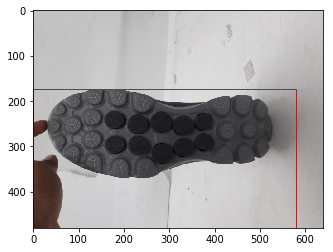

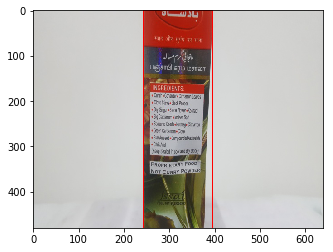

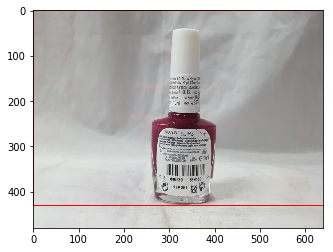

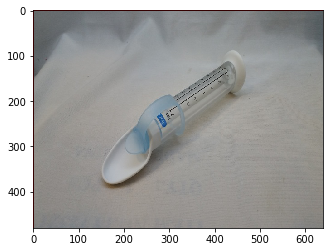

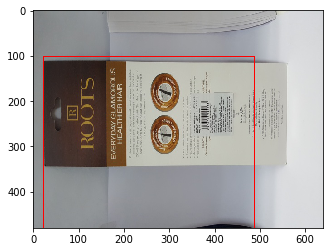

In [6]:
for ctr, im in enumerate(test_df.image_name):
    img = cv2.imread(os.path.join(img_data_path, im))
    x1, x2, y1, y2 = get_bbox(img, 1200)
    a1, a2, b1, b2 = get_bbox(img, 2000)
    assert(x1 == a1)
    test_df.at[ctr, 'x1'] = int((x1 + a1) / 2)
    test_df.at[ctr, 'x2'] = int((x2 + a2) / 2)
    test_df.at[ctr, 'y1'] = int((y1 + b1) / 2)
    test_df.at[ctr, 'y2'] = int((y2 + b2) / 2)
    if ctr % 1000 == 0:
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),2);
        plt.figure(ctr//1000)
        print(im)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

test_df.to_csv(os.path.join('X:/Flipkart GRID - Object Localization (Medium Complexity Round)/orig_data', 'submission_7.csv'), index = False)